# Processing of data collection

## Getting songs IDs

Getting the song name and id from a playlist with 100 songs that I like. And  75 songs I don't like.<br>
First I generated playlist.py(ids folder) using [Get Playlist's items API](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-playlists-tracks) to get the songs' ids through the shell and pass it to a python file in order to get the individual songs id.<br>

## Generating Songs IDs
Then using [Spotify's Audio Feature for several tracks API](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features)
I generated a JSON(data folder) with the shell to get the audio features from the tracks<br>
From [Spotify documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features):
- Acousticness
    - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability
    - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- duration_ms
    - The duration of the track in milliseconds.
- energy
    - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- instrumentalness
     - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness
    - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness
    - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- mode
    - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness
    - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- tempo
    - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- time_signature
    - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

# Library Import

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
import json

cf.go_offline()

# Data Cleaning

In [2]:
#return a dict of the json
with open('./data/liked_ids.json', 'r') as f:
    likes = json.load(f)

with open('./data/disliked_ids.json', 'r') as f:
    dislikes = json.load(f)

In [3]:
likes = pd.DataFrame(likes['audio_features'])
likes = likes.drop(["type", "id", "uri", "track_href", "analysis_url", "time_signature"], axis=1)
likes

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.643,0.594,9,-5.191,0,0.0312,0.06950,0.000015,0.1150,0.195,118.037,250142
1,0.440,0.465,3,-6.592,1,0.0318,0.68900,0.000001,0.3840,0.241,126.937,310394
2,0.546,0.640,8,-5.582,1,0.3700,0.04380,0.000000,0.1370,0.630,137.728,339250
3,0.711,0.611,1,-5.453,1,0.3290,0.00575,0.000000,0.2310,0.144,134.140,252070
4,0.746,0.798,0,-8.382,1,0.3490,0.13700,0.000000,0.1390,0.553,109.968,214827
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.812,0.714,11,-8.045,0,0.3060,0.00806,0.000000,0.1790,0.690,94.612,235200
96,0.792,0.588,1,-9.319,0,0.0770,0.09280,0.001550,0.0656,0.731,119.950,206253
97,0.860,0.791,0,-4.784,1,0.0568,0.16900,0.000106,0.1060,0.887,92.023,175918
98,0.767,0.379,0,-10.348,1,0.0385,0.66800,0.000145,0.2170,0.252,103.956,230578


In [4]:
likes["is_likeable"] = 1

In [5]:
dislikes = pd.DataFrame(dislikes['audio_features'])
dislikes = dislikes.drop(["type", "id", "uri", "track_href", "analysis_url", "time_signature"], axis=1)
dislikes

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.551,0.736,9,-3.731,0,0.2000,0.074800,0.000426,0.2900,0.481,142.286,178500
1,0.389,0.519,6,-6.400,0,0.0340,0.478000,0.000000,0.2130,0.723,181.728,310581
2,0.837,0.611,7,-4.127,1,0.0761,0.347000,0.000040,0.0497,0.429,99.974,232080
3,0.761,0.359,11,-11.559,0,0.0730,0.851000,0.510000,0.1130,0.384,118.000,431049
4,0.897,0.597,10,-4.032,0,0.0575,0.052100,0.000000,0.1140,0.403,113.005,186828
...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.389,0.665,0,-6.169,1,0.0644,0.178000,0.000732,0.1160,0.199,117.055,193547
71,0.526,0.882,9,-4.006,1,0.0509,0.001400,0.000000,0.1440,0.424,144.982,211493
72,0.388,0.633,9,-4.769,1,0.0275,0.033900,0.000000,0.1040,0.381,173.947,252440
73,0.483,0.961,4,-3.314,1,0.0683,0.000842,0.000015,0.3470,0.177,98.526,183107


In [6]:
dislikes["is_likeable"] = 0 

In [7]:
df = pd.concat([likes, dislikes])

In [8]:
df = shuffle(df)

In [9]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_likeable
77,0.744,0.804,1,-6.327,1,0.0677,0.023100,0.000000,0.0494,0.426,104.823,205715,1
47,0.569,0.421,1,-12.333,1,0.0442,0.417000,0.023300,0.1200,0.250,130.025,230173,1
50,0.760,0.477,4,-7.645,1,0.1110,0.860000,0.000426,0.1010,0.460,118.107,187039,1
59,0.752,0.764,1,-4.399,1,0.0380,0.047600,0.000094,0.0543,0.582,121.958,163216,1
40,0.664,0.388,9,-8.860,0,0.3040,0.613000,0.000037,0.3050,0.472,79.735,232490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.643,0.594,9,-5.191,0,0.0312,0.069500,0.000015,0.1150,0.195,118.037,250142,1
15,0.454,0.407,11,-10.733,1,0.0739,0.582000,0.774000,0.1170,0.242,81.401,187134,1
35,0.649,0.953,9,-3.360,1,0.0535,0.013000,0.000000,0.0898,0.329,125.027,142020,0
85,0.908,0.621,1,-6.638,0,0.1020,0.000282,0.000054,0.0958,0.421,150.011,177000,1


In [10]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
is_likeable           int64
dtype: object

In [11]:
target = 'is_likeable'
disc = ["mode"]
cont = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

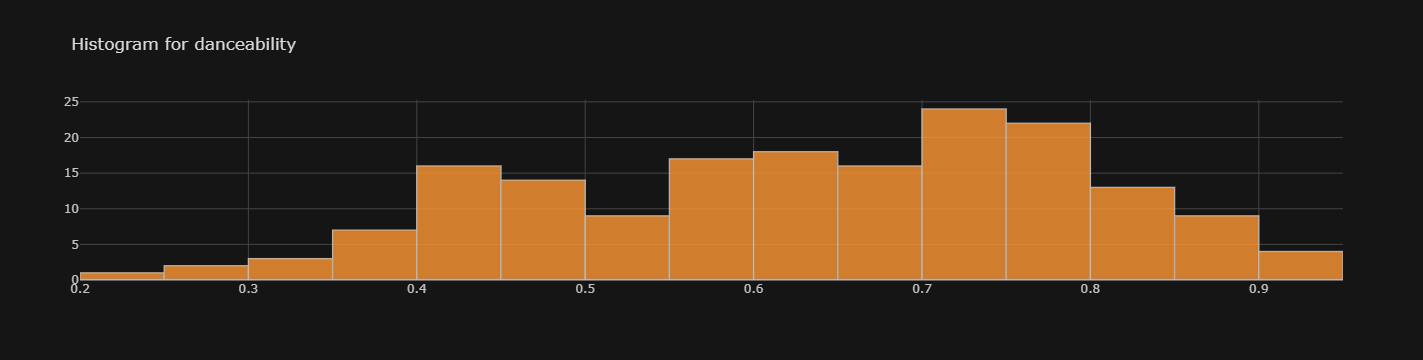

None

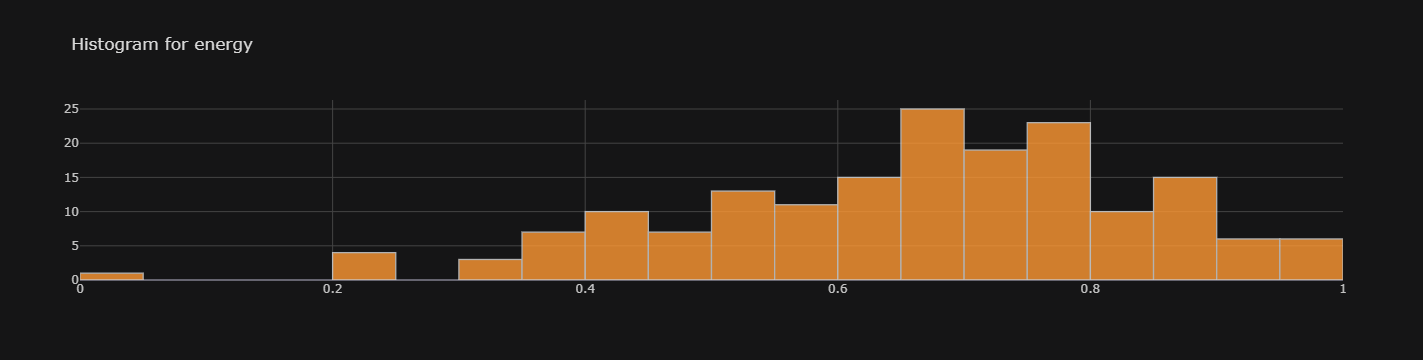

None

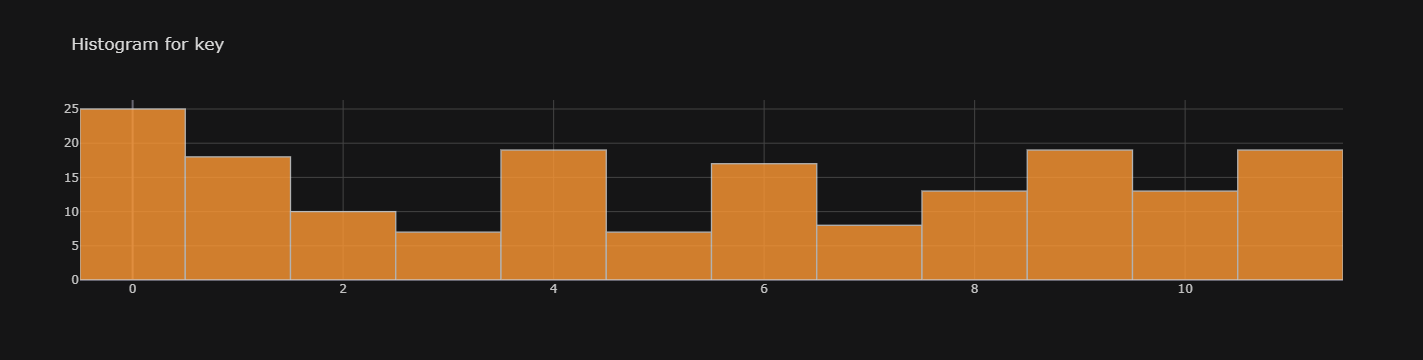

None

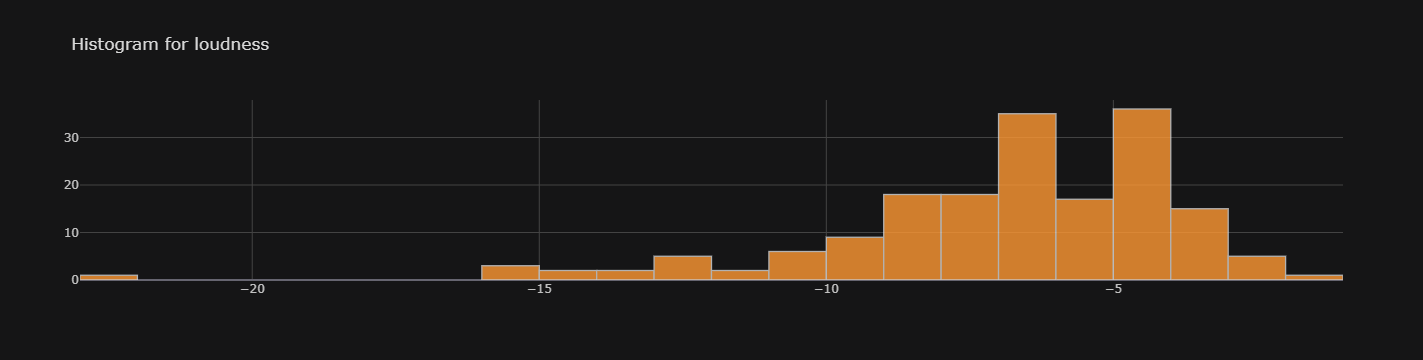

None

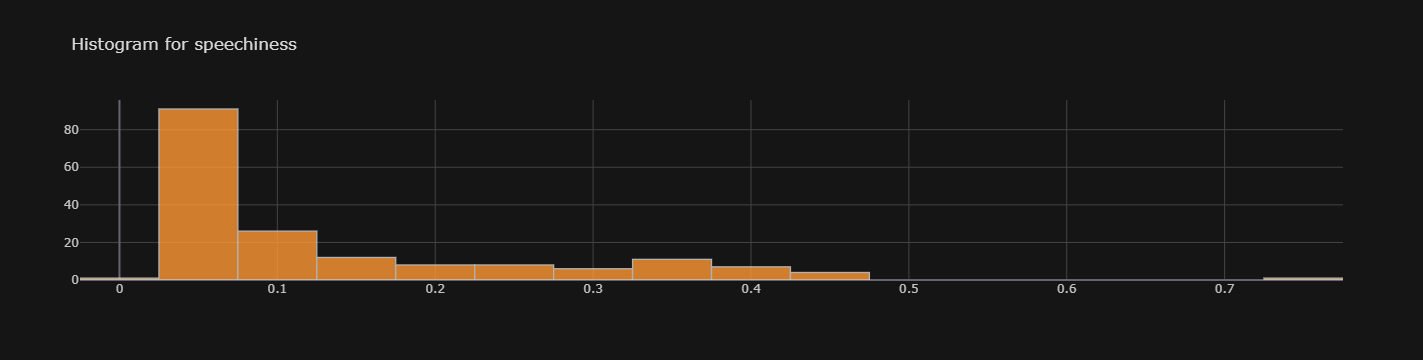

None

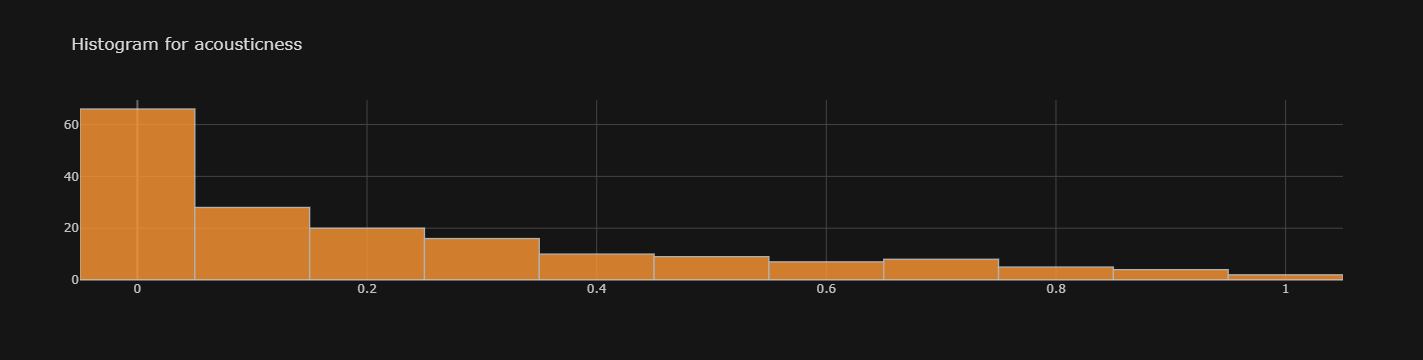

None

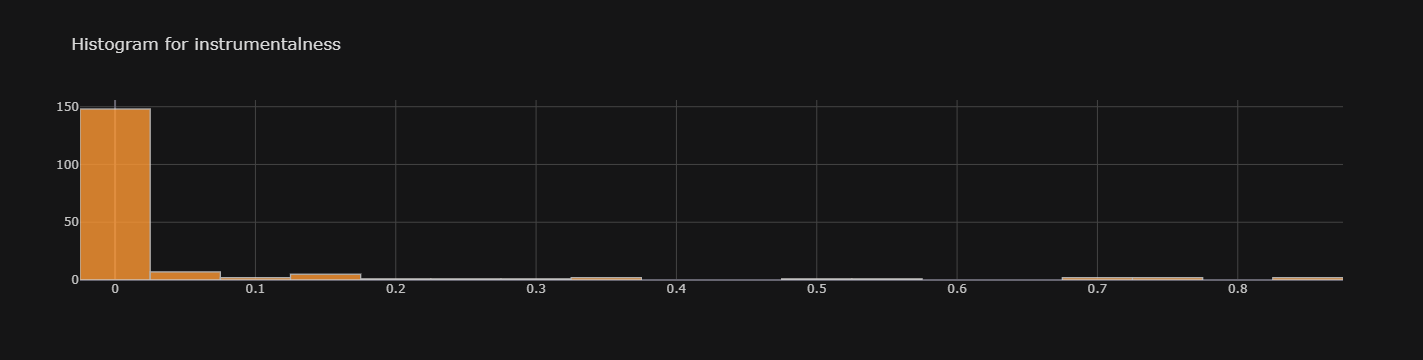

None

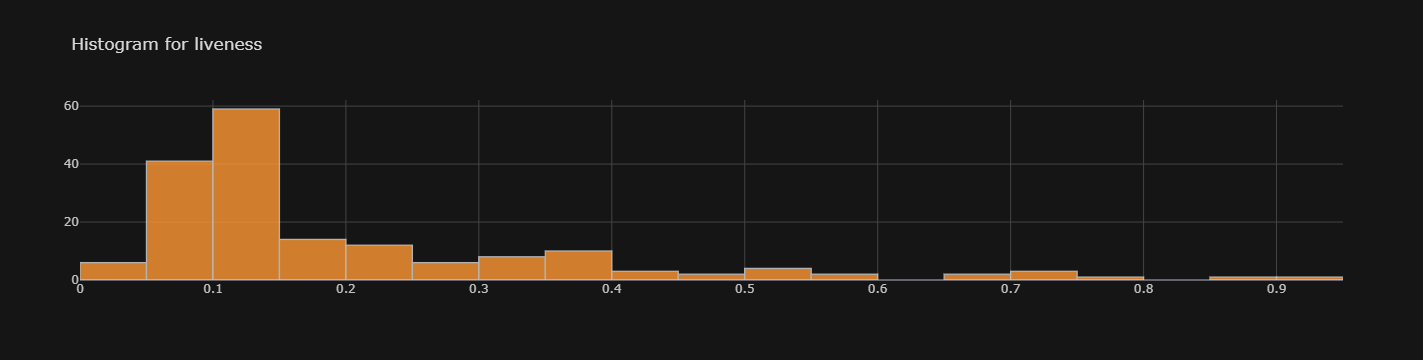

None

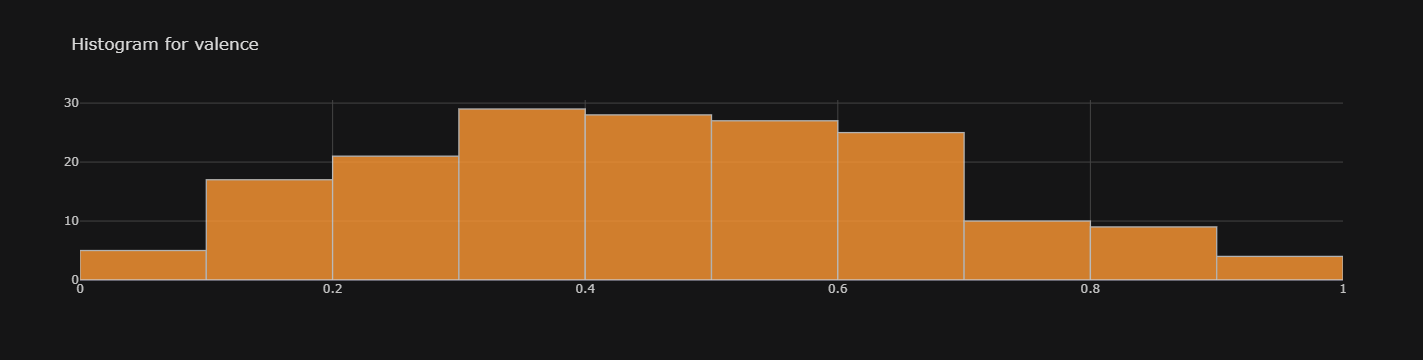

None

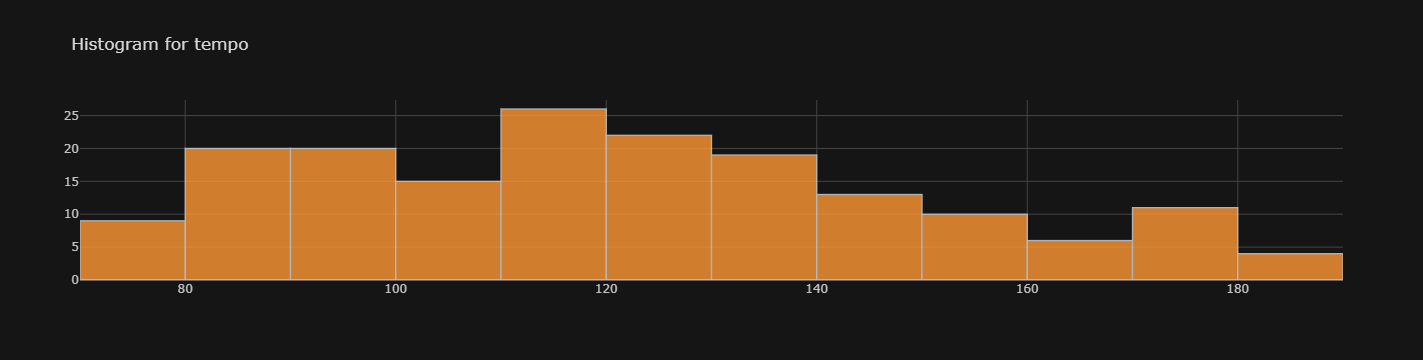

None

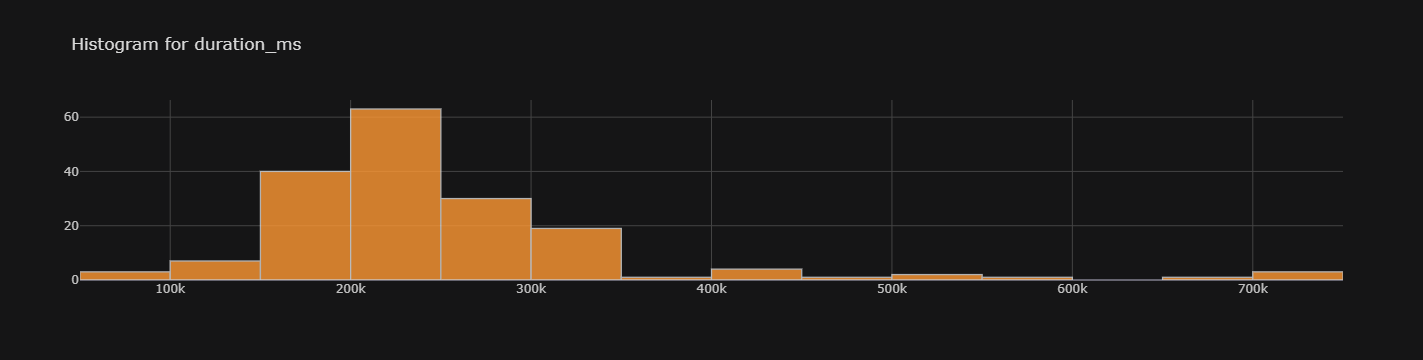

None

In [12]:
for variable in cont:
    display(df[variable].iplot(kind="hist", theme="solar", title=f"Histogram for {variable}"))

In [13]:
df[cont].describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.634446,0.661612,5.382857,-6.819057,0.131823,0.229424,0.048520,0.200218,0.461017,121.132166,250242.137143
std,0.157510,0.179161,3.793028,2.995096,0.128157,0.261727,0.158085,0.171800,0.215586,29.027451,103610.680663
min,0.213000,0.007130,0.000000,-22.499000,0.024300,0.000015,0.000000,0.029300,0.058600,70.355000,68500.000000
25%,0.511500,0.541000,2.000000,-8.216500,0.043550,0.018850,0.000000,0.099350,0.307000,96.088000,191638.000000
50%,0.654000,0.679000,6.000000,-6.327000,0.072200,0.126000,0.000015,0.118000,0.442000,118.107000,231362.000000
75%,0.760500,0.785000,9.000000,-4.675500,0.185000,0.361000,0.000652,0.247500,0.608000,139.920500,270407.000000
max,0.921000,0.992000,11.000000,-1.452000,0.750000,0.992000,0.863000,0.915000,0.969000,184.099000,727107.000000


# Modelling

In [14]:
X = df[disc+cont]

In [15]:
y = df[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [17]:
pipe = Pipeline([("imputador", SimpleImputer(strategy="median")),
                 ("modelo", LogisticRegression(max_iter=1000))])

In [18]:
pipe

Pipeline(steps=[('imputador', SimpleImputer(strategy='median')),
                ('modelo', LogisticRegression(max_iter=1000))])

In [19]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputador', SimpleImputer(strategy='median')),
                ('modelo', LogisticRegression(max_iter=1000))])

In [20]:
pipe.score(X_train, y_train)

0.5238095238095238

In [21]:
pipe.score(X_test, y_test)

0.5714285714285714

In [22]:
logreg = LogisticRegression()

In [23]:
logreg.fit(X, y)

LogisticRegression()

In [24]:
logreg.score(X, y)

0.5714285714285714

In [25]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
logreg.score(X_train, y_train)

0.5238095238095238

In [29]:
ls_scores = cross_val_score(X=X_train, y=y_train, cv=10, n_jobs=-1, estimator=logreg, scoring="roc_auc")

In [32]:
ls_scores.mean()

0.5168333333333333